<a href="https://colab.research.google.com/github/Divine193/access6.0projects/blob/master/Week8/Project_notebooks/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
medic_insure = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [ ]:
# The first Ten Elements
medic_insure.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# General info of the dataset
medic_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Shape of the dataset
medic_insure.shape

(1338, 7)

In [ ]:
# Summary Statistics
medic_insure.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# EDA

In [ ]:
# Put the columns into a list
full_cols = medic_insure.columns
full_cols.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [ ]:
# Seperate Numerical Columns from Categorical Columns
num_cols = full_cols[medic_insure.dtypes != 'object']
cat_cols = full_cols[medic_insure.dtypes == 'object']
print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


## Univariate Analysis

Text(0.5, 1.0, 'Distribution of Ages')

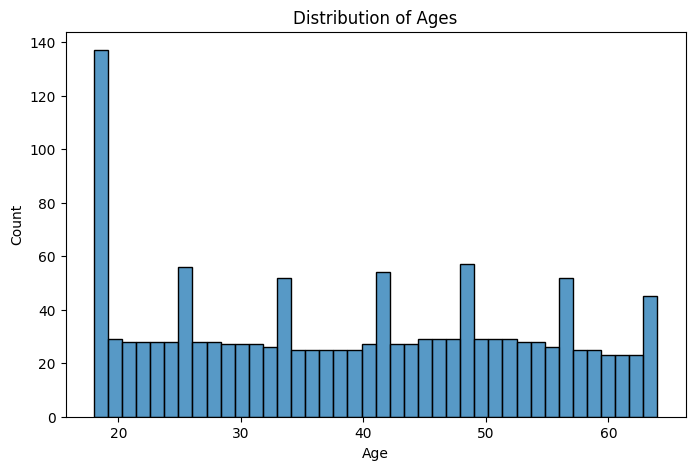

In [ ]:
# Distribution of Raw Ages
plt.figure(figsize=(8,5))
sns.histplot(medic_insure, x='age', bins=40)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')

In [ ]:
# Specify the bins and labels
bins = [17, 39, 45, 60, 100]
labels = ['Young Adult', 'Middle Aged', 'Senior', 'Elderly']

# Create Bucketed Feature
medic_insure['age_group'] = pd.cut(medic_insure['age'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Distribution of Age Groups')

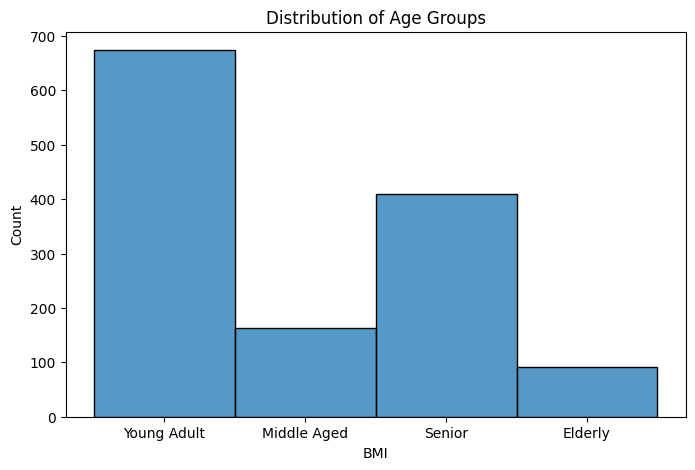

In [ ]:
# Distribution of Grouped Ages
plt.figure(figsize=(8,5))
sns.histplot(medic_insure, x='age_group', bins=40)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')

Text(0.5, 1.0, 'Distribution of BMIs')

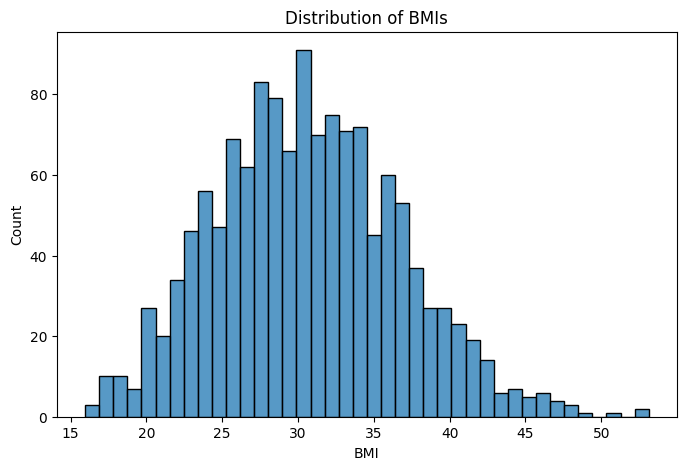

In [ ]:
# Distribution of BMI
plt.figure(figsize=(8,5))
sns.histplot(medic_insure, x='bmi', bins=40)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMIs')

Text(0.5, 1.0, 'Distribution of Charges')

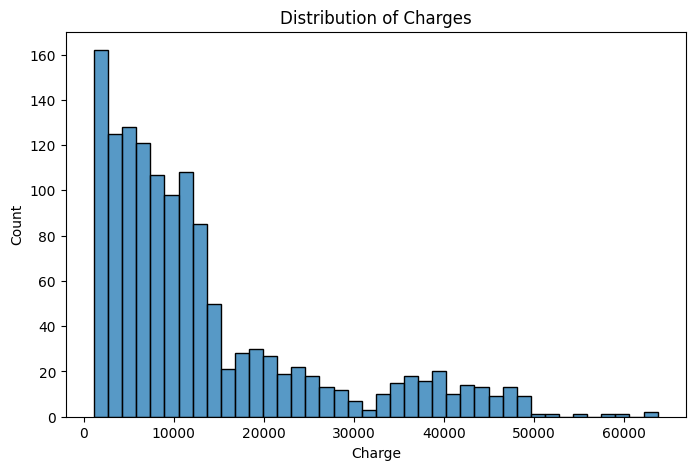

In [ ]:
# Distribution of Charges
plt.figure(figsize=(8,5))
sns.histplot(medic_insure, x='charges', bins=40)
plt.xlabel('Charge')
plt.ylabel('Count')
plt.title('Distribution of Charges')

Text(0.5, 1.0, 'Distribution of Log Charges')

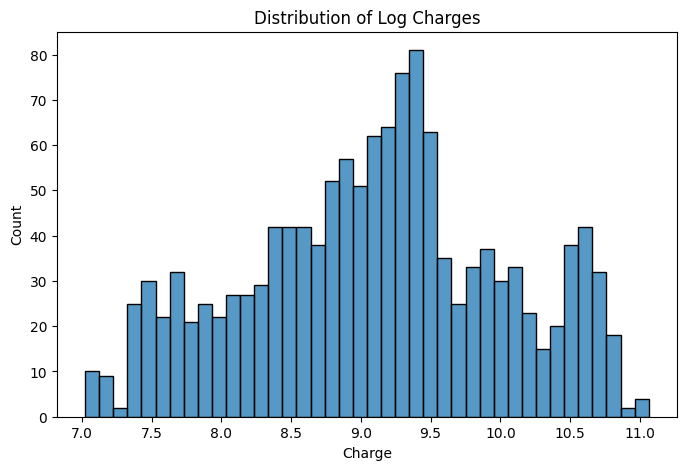

In [ ]:
# Log Transform the charges column
medic_insure['log_charges'] = np.log1p(medic_insure['charges'])

plt.figure(figsize=(8,5))
sns.histplot(medic_insure, x='log_charges', bins=40)
plt.xlabel('Charge')
plt.ylabel('Count')
plt.title('Distribution of Log Charges')

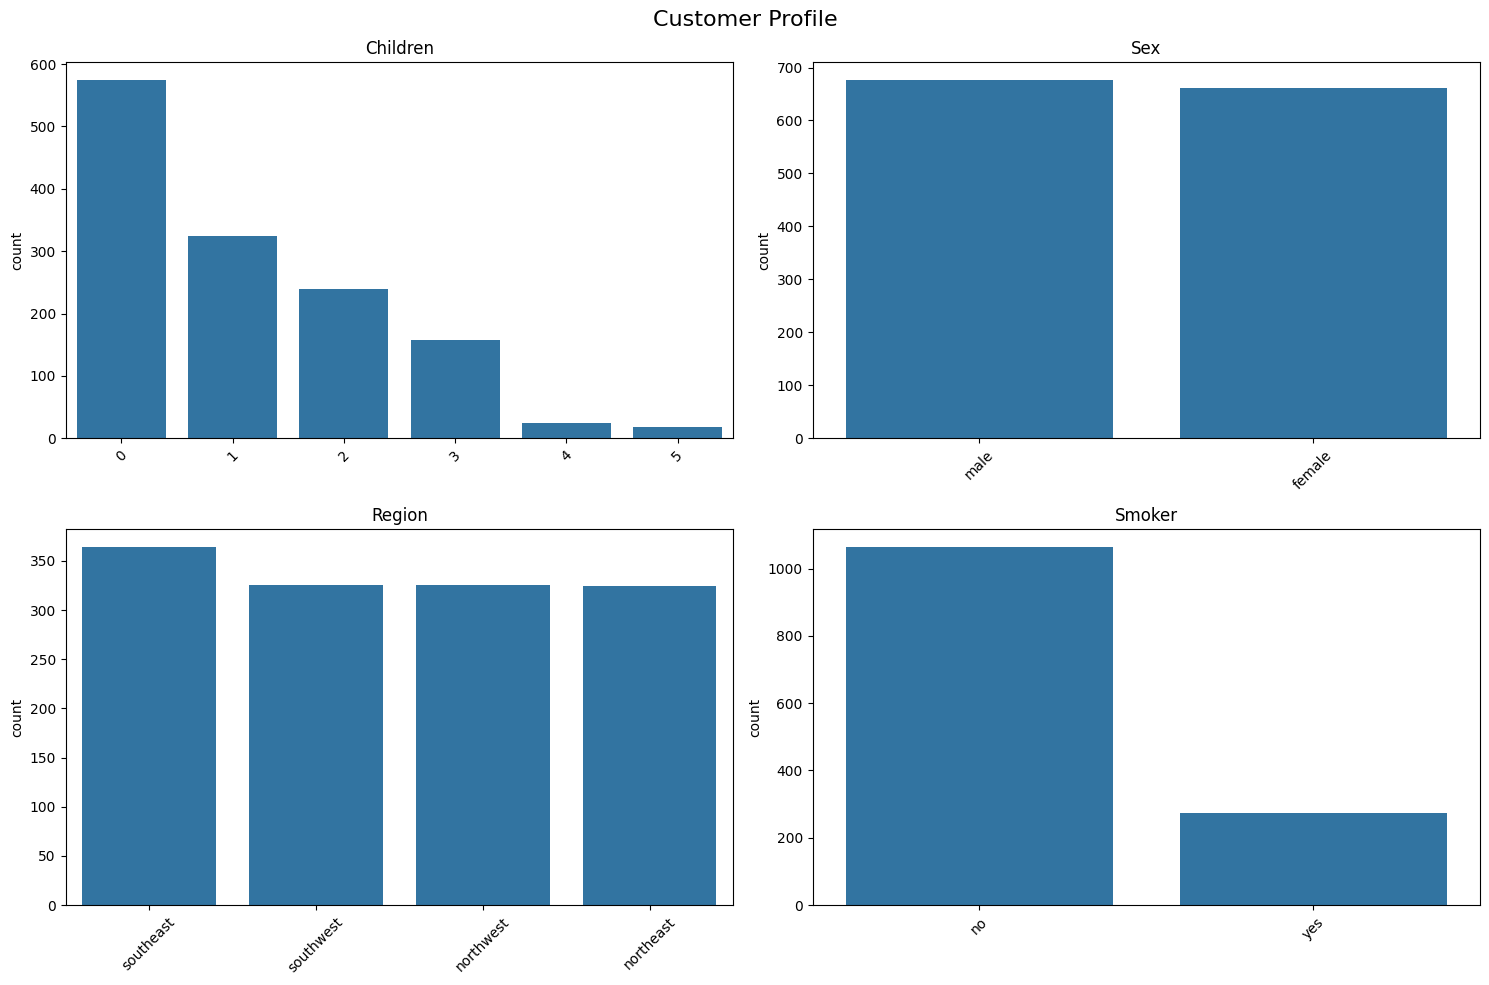

In [ ]:
# Univariate Analysis of the Customer Profile Columns
cols = [
       'children',
        'sex',
        'region',
        'smoker'
    ]
def columns1(cols):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.countplot(
            x=col,
            data=medic_insure,
            order=medic_insure[col].value_counts().index,
            ax=axes[i]
        )
        axes[i].set_title(col.replace('_', ' ').title())
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)


    fig.suptitle('Customer Profile', fontsize=16)
    plt.tight_layout()

columns1(cols)

## Bivariate Analysis

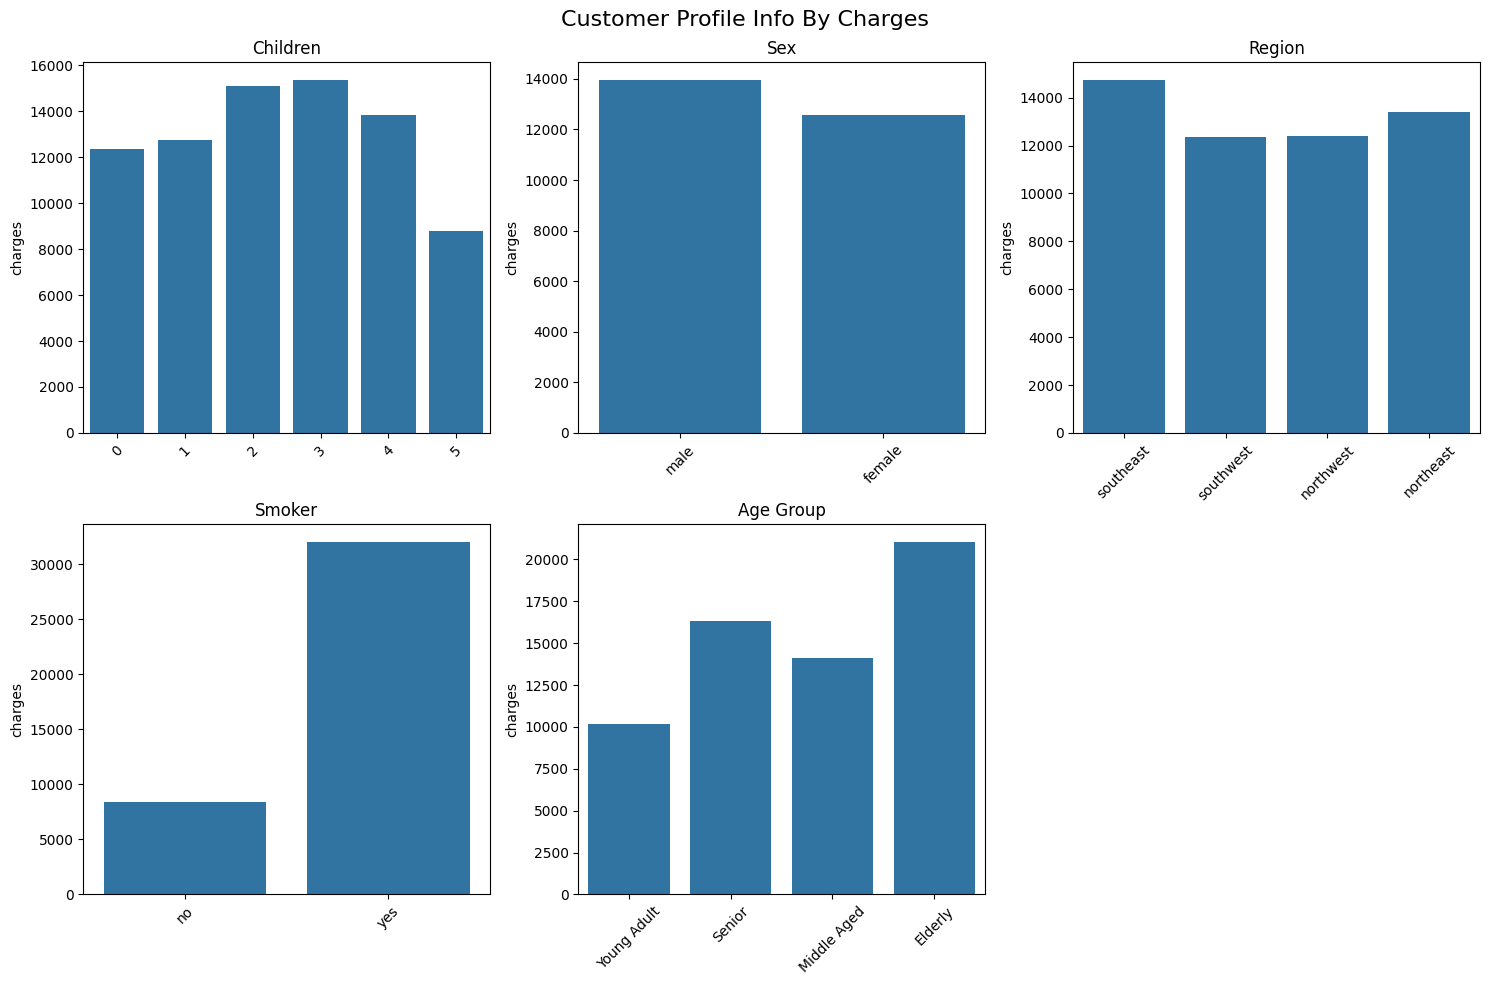

In [ ]:
# Distribution of Customers By Charges
cols = [
       'children',
        'sex',
        'region',
        'smoker',
        'age_group'
    ]
def columns2(cols):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.barplot(
            x=col,
            y='charges',
            errorbar=None,
            data=medic_insure,
            order=medic_insure[col].value_counts().index,
            ax=axes[i]
        )
        axes[i].set_title(col.replace('_', ' ').title())
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle('Customer Profile Info By Charges', fontsize=16)
    plt.tight_layout()

columns2(cols)

Text(0.5, 1.0, 'Distribution of Charges By Sex & Smoking Habits')

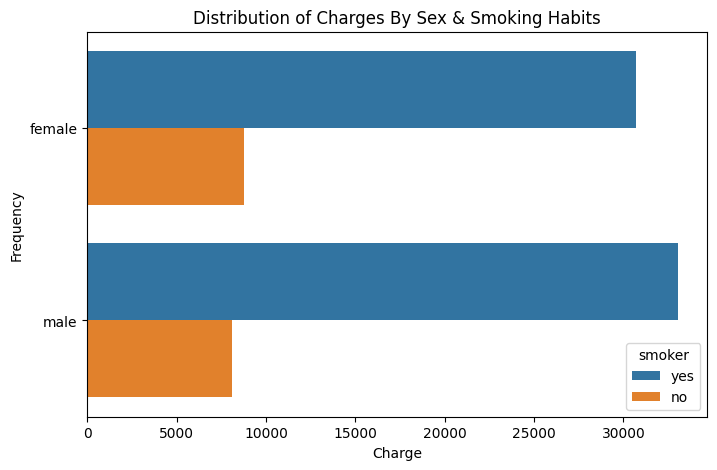

In [ ]:
# Distribution of Charges By Sex & Smoking Habits
plt.figure(figsize=(8,5))
sns.barplot(x='charges',y='sex',errorbar=None, data=medic_insure, hue='smoker')
plt.xlabel('Charge')
plt.ylabel('Frequency')
plt.title('Distribution of Charges By Sex & Smoking Habits')

Text(42.024572916666656, 0.5, 'Charges')

<Figure size 1000x800 with 0 Axes>

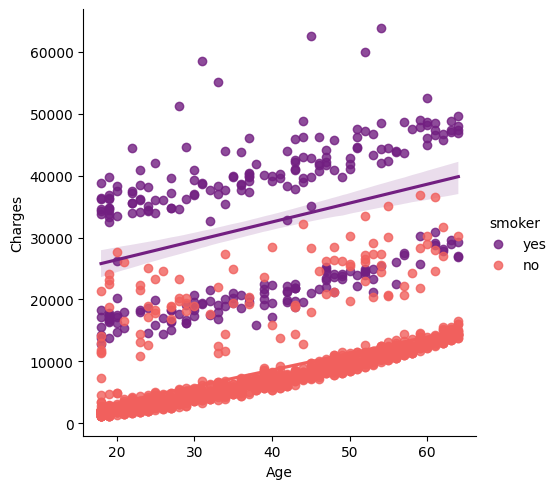

In [ ]:
# Correlation Analysis Between Age & Charge By Smoking Habits
plt.figure(figsize=(10,8))
sns.lmplot(x='age',y='charges', hue='smoker', data=medic_insure, palette= 'magma')
plt.xlabel('Age')
plt.ylabel('Charges')

Text(42.024572916666656, 0.5, 'Charges')

<Figure size 1000x800 with 0 Axes>

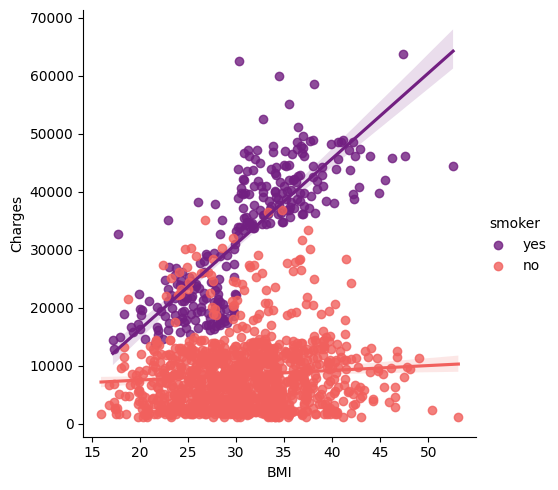

In [ ]:
# Correlation Analysis Between BMI & Charge By Smoking Habits
plt.figure(figsize=(10,8))
sns.lmplot(x='bmi',y='charges', hue='smoker', data=medic_insure, palette= 'magma')
plt.xlabel('BMI')
plt.ylabel('Charges')

## Multivariate Analysis

In [ ]:
corr_analysis = medic_insure[num_cols].corr()
display(corr_analysis)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Analysis of the Numerical Columns')

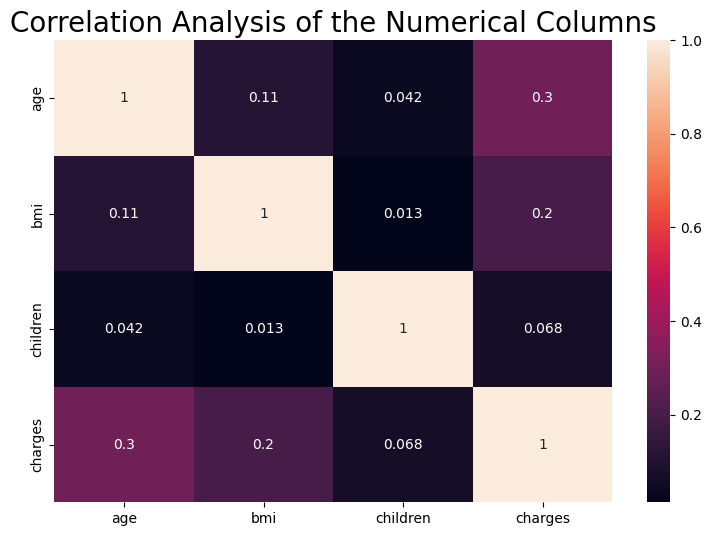

In [ ]:
#  Correlation Analysis of Numerical Columns
plt.figure(figsize=(9,6))
sns.heatmap(corr_analysis, annot=True)
plt.title('Correlation Analysis of the Numerical Columns', fontsize=20)

# Model Building

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
# make a copy of the dataset
med_insure = medic_insure.copy()

In [ ]:
# Separate the features and target
x = med_insure.drop(['charges', 'log_charges', 'age_group'], axis=1)
y = med_insure['log_charges']

In [ ]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
y.head()

,log_charges
0,9.734236
1,7.453882
2,8.400763
3,9.998137
4,8.260455


In [ ]:
# Categorical and Numerical Features
cat_features = x.select_dtypes(include=['object']).columns
num_features = x.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
cat_features, num_features

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children'], dtype='object'))

## Preprocessing

In [ ]:
scale = StandardScaler()
encoder = OneHotEncoder(handle_unknown = 'ignore')

# column transformer
preprocessor = ColumnTransformer(
    transformers = [
       ('num_scale', scale, num_features),
        ('cat_encode', encoder, cat_features)
    ]
)

## Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42)



In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

## Building the model Pipeline

In [ ]:
models = {
    'Linear Regression' : Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),

    'Decision Tree' : Pipeline([
        ('preprocessor', preprocessor),
        ('dt_regressor', DecisionTreeRegressor(random_state = 42))
    ]),

    'Random Forest' : Pipeline([
        ('preprocessor', preprocessor),
        ('rf_regressor', RandomForestRegressor(random_state = 42))
    ]),

    'XGB' : Pipeline([
        ('preprocessor', preprocessor),
        ('xgb_regressor', XGBRegressor(random_state = 42))
    ])

}

## Evaluation Metrics

In [ ]:
def evaluation_score(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)


    train_log_preds = model.predict(X_train)
    test_log_preds = model.predict(X_test)

    train_actual_preds = np.expm1(train_log_preds)
    test_actual_preds = np.expm1(test_log_preds)
    y_train_actual = np.expm1(y_train)
    y_test_actual = np.expm1(y_test)


    r2 = r2_score(y_test, test_log_preds)

    mae_test = mean_absolute_error(y_test_actual, test_actual_preds)
    mae_train = mean_absolute_error(y_train_actual, train_actual_preds)
    rmse_test = np.sqrt(mean_squared_error(y_test_actual, test_actual_preds))

    return mae_test, mae_train, rmse_test, r2


In [ ]:
results = []

for model_name, model in models.items():
    mae_test, mae_train, rmse_test, r2 = evaluation_score(model, X_train, X_test, y_train, y_test)

    results.append({
        'Model' : model_name,
        'Mae Train' : mae_train,
        'Mae Test' : mae_test,
        'Rmse' : rmse_test,
        'R2 Score' : r2
    })

results_df = pd.DataFrame(results)
results_df

,Model,Mae Train,Mae Test,Rmse,R2 Score
0,Linear Regression,4270.278412,3888.443159,7814.064026,0.804741
1,Decision Tree,29.572515,3001.795687,6435.987395,0.725848
2,Random Forest,985.687222,2079.004660,4398.870115,0.846447
3,XGB,501.234347,2507.287860,5209.184286,0.829569


## Visual Comparison of Model Performance

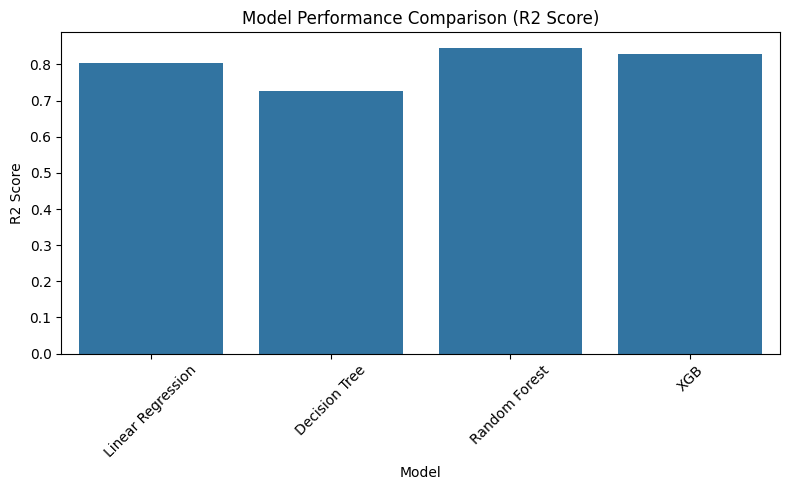

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data= results_df, x='Model', y='R2 Score')
plt.title('Model Performance Comparison (R2 Score)')
plt.xticks(rotation=45)
plt.tight_layout()

## Coefficients influencing Predictions

In [ ]:
# Get the Linear Regression model pipeline
linear_reg_model = models['Linear Regression']

# Fit the model to ensure all transformers are fitted
linear_reg_model.fit(X_train, y_train)

# Extract the Linear Regression estimator
lin_reg_estimator = linear_reg_model.named_steps['regressor']

# Get coefficients
coefficients = lin_reg_estimator.coef_

# Get feature names from the preprocessor
# Numerical features
num_feature_names = num_features.to_list()

# Categorical features after one-hot encoding
fitted_onehotencoder = linear_reg_model.named_steps['preprocessor'].named_transformers_['cat_encode']
cat_feature_names = fitted_onehotencoder.get_feature_names_out(cat_features).tolist()

# Combine all feature names
all_feature_names = num_feature_names + cat_feature_names

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value to find the strongest ones
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
strongest_coefficients = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])

display(strongest_coefficients)

,Feature,Coefficient
6,smoker_yes,0.775760
5,smoker_no,-0.775760
0,age,0.481643
2,children,0.112328
1,bmi,0.082146
7,region_northeast,0.078739
9,region_southeast,-0.057288
10,region_southwest,-0.043788
3,sex_female,0.037161
4,sex_male,-0.037161


## Cross Validation

In [ ]:
cv_scores = cross_val_score(models['Random Forest'],
                            x,
                            y,
                            scoring = 'neg_root_mean_squared_error', cv=5)
print(f'Scores : {-cv_scores}')
print(f'Average Cv RMSE: {-cv_scores.mean()}')


Scores : [0.36698883 0.50585962 0.30742445 0.38128361 0.40966992]
Average Cv RMSE: 0.39424528668201453


## Feature Importance (Random Forest)

In [ ]:
model_rf = models['Random Forest']
model_rf.fit(X_train, y_train)

# Get numerical feature names directly
feature_names_num = num_features.to_list()

# Get categorical feature names from the fitted OneHotEncoder
fitted_onehotencoder = model_rf.named_steps['preprocessor'].named_transformers_['cat_encode']
feature_names_cat = fitted_onehotencoder.get_feature_names_out(cat_features).tolist()

# Combine all feature names
feature_names = feature_names_num + feature_names_cat

importances = model_rf.named_steps['rf_regressor'].feature_importances_

importance_df = pd.DataFrame({
    'feature' : feature_names,
    'importance' : importances
}).sort_values(by= 'importance', ascending = False)

display(importance_df.head(10))

,feature,importance
0,age,0.380766
5,smoker_no,0.261562
6,smoker_yes,0.175296
1,bmi,0.098228
2,children,0.041645
7,region_northeast,0.010282
3,sex_female,0.007258
8,region_northwest,0.006986
4,sex_male,0.006888
9,region_southeast,0.006387


## Hyperparameter Tuning using GridSearchCV

In [ ]:
param_grid = {
    'rf_regressor__n_estimators': [100, 200, 300],
    'rf_regressor__max_features': [0.6, 0.8, 1.0],
    'rf_regressor__max_depth': [5, 10, 15, None],
    'rf_regressor__min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=models['Random Forest'], # Use the Random Forest pipeline
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error', # Use RMSE as scoring metric
    n_jobs=-1, # Use all available cores
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_scale',
                                                                         StandardScaler(),
                                                                         Index(['age', 'bmi', 'children'], dtype='object')),
                                                                        ('cat_encode',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['sex', 'smoker', 'region'], dtype='object'))])),
                                       ('rf_regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf_regressor__max_depth': [5, 10, 15, None],
                         'rf_regressor__max_features': [0.6, 0.8, 1.0],
                         'rf_regressor__min_samples_split': [2, 5, 10],
                         'rf_regressor__n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
# Display the best parameters and best score
print("Best parameters found:", grid_search_rf.best_params_)
print("Best RMSE found:", -grid_search_rf.best_score_)

Best parameters found: {'rf_regressor__max_depth': 5, 'rf_regressor__max_features': 0.8, 'rf_regressor__min_samples_split': 2, 'rf_regressor__n_estimators': 300}
Best RMSE found: 0.38019844721771834


In [ ]:
# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model
mae_test_tuned, mae_train_tuned, rmse_test_tuned, r2_tuned = evaluation_score(best_rf_model, X_train, X_test, y_train, y_test)

# Add the tuned model's results to the results_df
tuned_rf_results = {
    'Model' : 'Random Forest (Tuned)',
    'Mae Train' : mae_train_tuned,
    'Mae Test' : mae_test_tuned,
    'Rmse' : rmse_test_tuned,
    'R2 Score' : r2_tuned
}

# Using concat to add a new row to the DataFrame
results_df = pd.concat([results_df, pd.DataFrame([tuned_rf_results])], ignore_index=True)

display(results_df)

,Model,Mae Train,Mae Test,Rmse,R2 Score
0,Linear Regression,4270.278412,3888.443159,7814.064026,0.804741
1,Decision Tree,29.572515,3001.795687,6435.987395,0.725848
2,Random Forest,985.687222,2079.004660,4398.870115,0.846447
3,XGB,501.234347,2507.287860,5209.184286,0.829569
4,Random Forest (Tuned),1917.983882,2018.000691,4382.313534,0.862969


## Residual Analysis

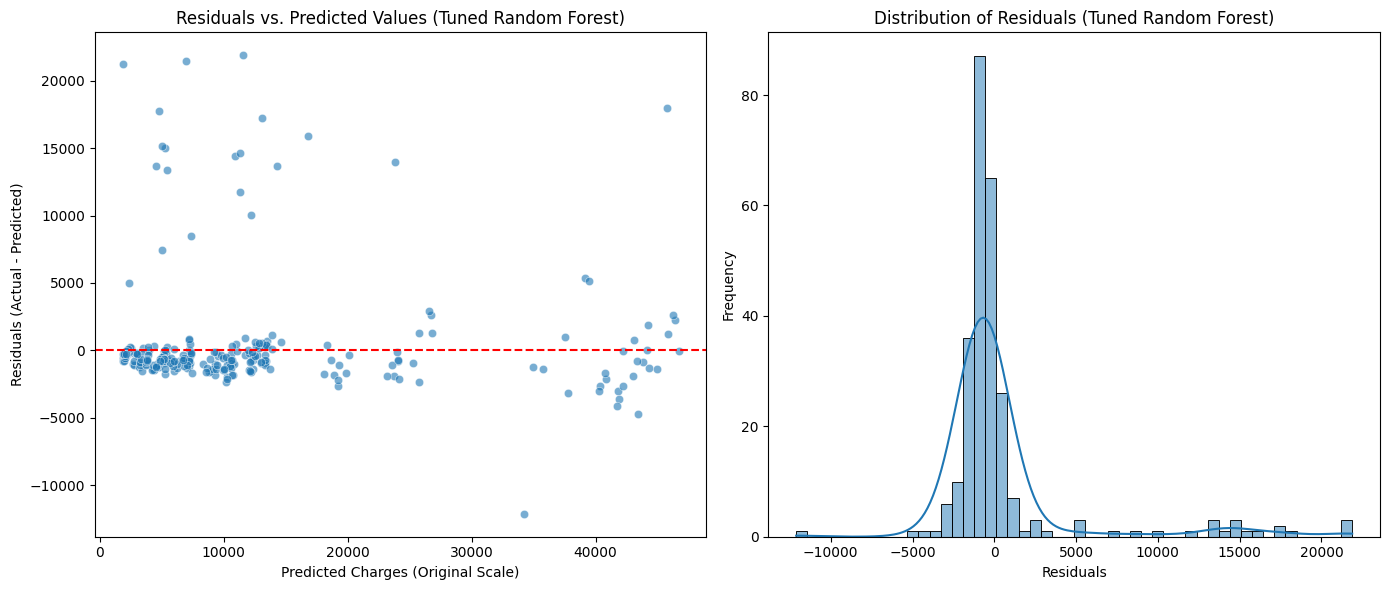

In [ ]:
# Get predictions from the best tuned Random Forest model on the test set
best_rf_model = grid_search_rf.best_estimator_
test_log_preds_tuned = best_rf_model.predict(X_test)

# Convert log predictions and actual log charges back to original scale
test_actual_preds_tuned = np.expm1(test_log_preds_tuned)
y_test_actual = np.expm1(y_test)

# Calculate residuals
residuals = y_test_actual - test_actual_preds_tuned

plt.figure(figsize=(14, 6))

# Plot 1: Residuals vs. Predicted Values
plt.subplot(1, 2, 1)
sns.scatterplot(x=test_actual_preds_tuned, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values (Tuned Random Forest)')
plt.xlabel('Predicted Charges (Original Scale)')
plt.ylabel('Residuals (Actual - Predicted)')

# Plot 2: Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=50)
plt.title('Distribution of Residuals (Tuned Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

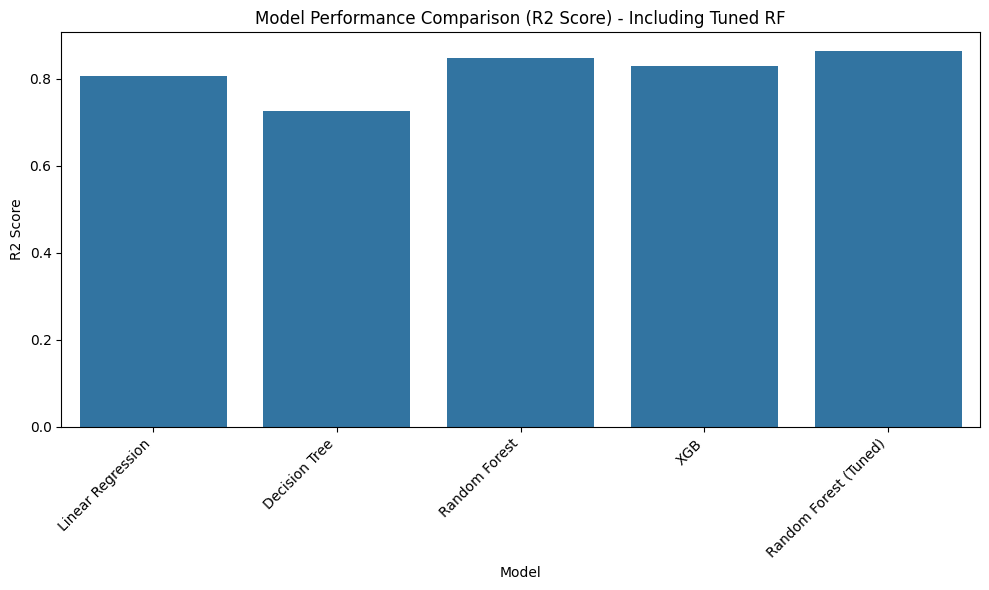

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Model', y='R2 Score')
plt.title('Model Performance Comparison (R2 Score) - Including Tuned RF')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()